## ANOVA with F-test

In [2]:
dataset=pd.read_csv(r'C:/Users/Shambhavi/Downloads/PlantGrowth.csv')

In [3]:
dataset

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [4]:
dataset.boxplot('weight',by='group',figsize=(12,8))

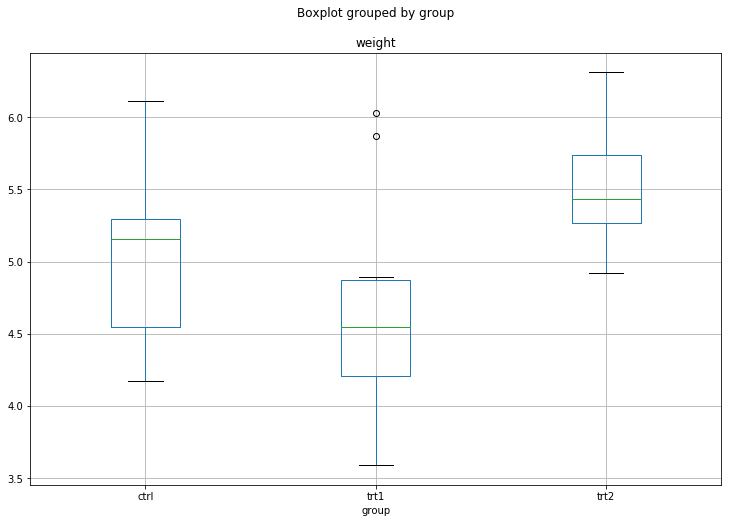

In [5]:
plt.show()

In [10]:
grps=pd.unique(dataset.group.values)
d_data={i:dataset['weight'][dataset.group==i]for i in grps}
d_data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64, 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64, 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

## One way ANOVA test ( F-test)

In [13]:
from scipy import stats
F,p=stats.f_oneway(d_data['ctrl'],d_data['trt1'],d_data['trt2'])
print("f value",F)
print("p value",p)

f value 4.846087862380136
p value 0.0159099583256229


## Two way ANOVA test

In [14]:
dataset2=pd.read_csv(r'C:/Users/Shambhavi/Downloads/ToothGrowth.csv')

In [15]:
dataset2

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5
5,6,10.0,VC,0.5
6,7,11.2,VC,0.5
7,8,11.2,VC,0.5
8,9,5.2,VC,0.5
9,10,7.0,VC,0.5


In [16]:
from statsmodels.graphics.factorplots import interaction_plot

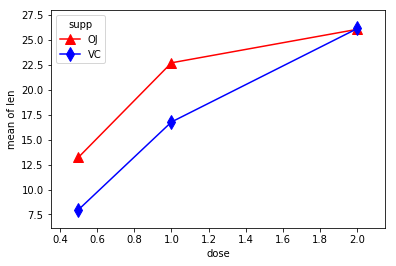

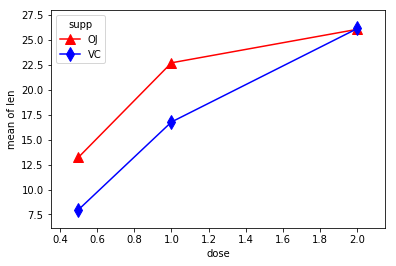

In [23]:
fig=interaction_plot(dataset2.dose,dataset2.supp,dataset2.len,colors=['red','blue'],markers=['^','d'],ms=10)
plt.show()

In [24]:
#degrees of freedom

In [28]:
N=len(dataset2.len)
df_a=len(dataset2.supp.unique())-1 #DOF of supplements
df_b=len(dataset2.dose.unique())-1 #DOF of dose
df_axb=df_a*df_b                   #DOF between supp and dose
df_w=N-(len(dataset2.supp.unique())*len(dataset2.dose.unique())) #DOF of total
df_w

54

In [30]:
#sum of squares- how distributed the values are

grand_mean=dataset2['len'].mean()
ssq_a=sum([(dataset2[dataset2.supp==i].len.mean()-grand_mean)**2 for i in dataset2.supp])
ssq_b=sum([(dataset2[dataset2.dose==i].len.mean()-grand_mean)**2 for i in dataset2.dose])
ssq_t=sum((dataset2.len-grand_mean)**2)



In [35]:
vc=dataset2[dataset2.supp=='VC']
oj=dataset2[dataset2.supp=='OJ']
vc_dose_means=[vc[vc.dose==d].len.mean() for d in vc.dose]
oj_dose_means=[oj[oj.dose==d].len.mean() for d in oj.dose]
ssq_w=sum((oj.len-oj_dose_means)**2)+sum((vc.len-vc_dose_means)**2)
ssq_axb=ssq_t-ssq_a-ssq_b-ssq_w
ssq_axb

108.31900000000155

In [37]:
#mean of squares ms=ssq/dof

ms_a=ssq_a/df_a
ms_b=ssq_b/df_b
ms_axb=ssq_axb/df_axb
ms_w=ssq_w/df_w
ms_w

13.187148148148149

In [38]:
f_a=ms_a/ms_w
f_b=ms_b/ms_w
f_axb=ms_axb/ms_w

In [40]:
p_a=stats.f.sf(f_a,df_a,df_w)       #sf=significane value
p_b=stats.f.sf(f_b,df_b,df_w)
p_axb=stats.f.sf(f_axb,df_axb,df_w)

In [41]:
results={'sum_sq':[ssq_a,ssq_b,ssq_axb,ssq_w],
        'df':[df_a,df_b,df_axb,df_w],
        'F':[f_a,f_b,f_axb,"NaN"],
        'PR(>F)':[p_a,p_b,p_axb,'Nan']}
columns=['Sum_sq','df','F','PR(>F)']
aov_table=pd.DataFrame(results,columns=columns,index=['Supp','Dose','Supp:Dose','Residual'])
aov_table

,Sum_sq,df,F,PR(>F)
Supp,NaN,1,15.572,0.000231183
Dose,NaN,2,92,4.04629e-18
Supp:Dose,NaN,2,4.10699,0.0218603
Residual,NaN,54,NaN,Nan
